In [21]:
import pickle 
import torch
import numpy as np


from genepro.multitree import Multitree
from genepro.node_impl import *
import numpy as np


class AdaptiveConstant(Constant):
    def __init__(self, value: float = None):
        super().__init__(value)
        # self.gamma = gamma
        # self.epsilon = epsilon
        self.sigma = (
            1.0  # np.max([np.exp(self.gamma * np.random.randn()), self.epsilon])
        )

    def set_sigma(self, sigma):
        self.sigma = sigma


def coeff_adaptive_mutation(
    multitree: Multitree,
    prob_coeff_mut: float = 0.25,
    gamma: float = 0.1,
    epsilon: float = 1e-16,
) -> Node:
    """
    Applies random coefficient mutations to constant nodes

    Parameters
    ----------
    tree : Node
      the tree to which coefficient mutations are applied
    prob_coeff_mut : float, optional
      the probability with which coefficients are mutated (default is 0.25)
    temp : float, optional
      "temperature" that indicates the strength of coefficient mutation, it is relative to the current value (i.e., v' = v + temp*abs(v)*N(0,1))

    Returns
    -------
    Node
      the tree after coefficient mutation (it is the same as the tree in input)
    """
    r = np.random.randint(multitree.n_trees)
    tree = multitree.children[r]
    coeffs = [n for n in tree.get_subtree() if type(n) == Constant]
    for c in coeffs:
        # decide wheter it should be applied
        if np.random.uniform() < prob_coeff_mut:
            v = c.get_value()
            # update the value by +- sigma*N(0,1)
            new_sigma = np.max([c.sigma * np.exp(gamma * np.random.randn()), epsilon])
            c.set_sigma(new_sigma)

            new_v = v + c.sigma * np.random.randn()

            c.set_value(new_v)

    multitree.children[r] = tree
    return multitree

loaded_results = None
with open("second_results/all_results.pkl", "rb") as f:
    loaded_results = pickle.load(f)

# quickly correct results dict

for i, res in enumerate(loaded_results):
    if 'descirption' in res:
        res['description'] = res.pop('descirption')

loaded_results

[{'description': 'basline experiment',
  'evo_args': {'internal_nodes': [+, -, *, /, min, max, sin],
   'leaf_nodes': [x_0, x_1, x_2, x_3, x_4, x_5, x_6, x_7, const?],
   'n_trees': 4,
   'pop_size': 64,
   'max_gens': 100,
   'max_tree_size': 40,
   'optimization_behavior': 'NONE',
   'batch_size': 64,
   'steps': 10,
   'lr': 0.01,
   'n_jobs': 20,
   'verbose': True,
   'fitness_function': ''},
  0: {'fitness': [-431.1861592421775,
    -287.0343789259591,
    34.1687617318708,
    4.731155737686834,
    103.08403011267156,
    60.85764048257073,
    269.19416622778226,
    191.46506755806757,
    182.14350297585867,
    204.93668930789735,
    157.45721856843846,
    312.578477687069,
    78.05903855510076,
    158.13031114672864,
    327.30778535849424,
    410.69445906033854,
    448.96404697185085,
    430.3425094800003,
    518.4530357153872,
    379.40072165698075,
    182.92869615075523,
    392.17014757187076,
    420.0403831289959,
    231.4167458069408,
    284.855315959193

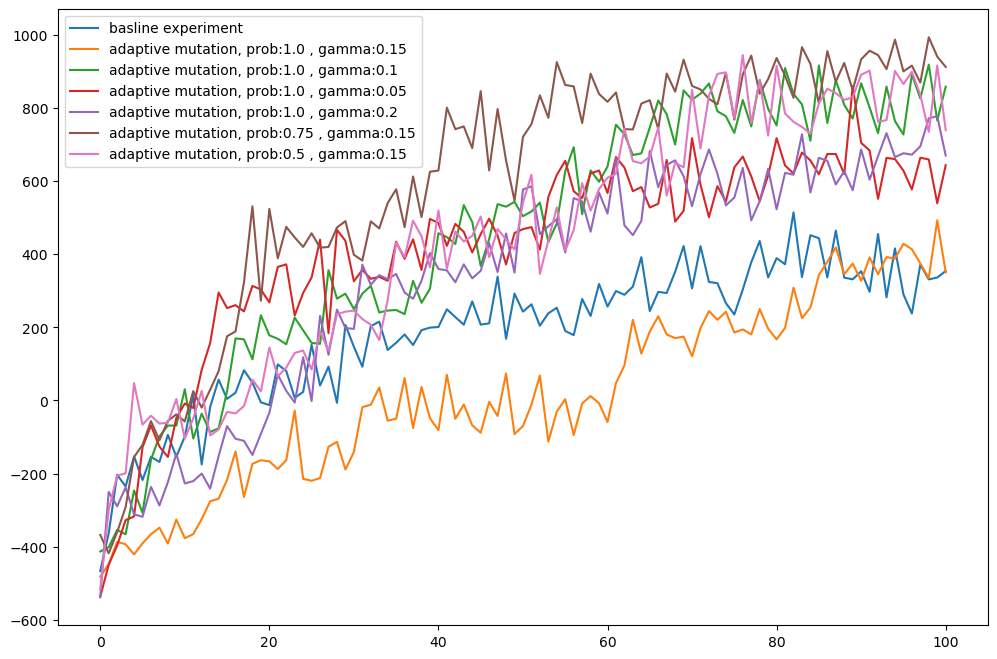

In [22]:
# import tikzplotlib
import matplotlib.pyplot as plt

repetitions = 3 #len(loaded_results[0])
no_of_experiments = len(loaded_results)
gens = np.arange(len(loaded_results[0][0]['fitness']))
plt.figure(figsize=(12, 8))
for exp in range(no_of_experiments):
    total_fitnesses = np.zeros(101)
    for rep in range(repetitions):
        total_fitnesses = total_fitnesses + loaded_results[exp][rep]['fitness']
    plt.plot(gens, total_fitnesses/repetitions, label=loaded_results[exp]['description'])

plt.legend()
plt.show()



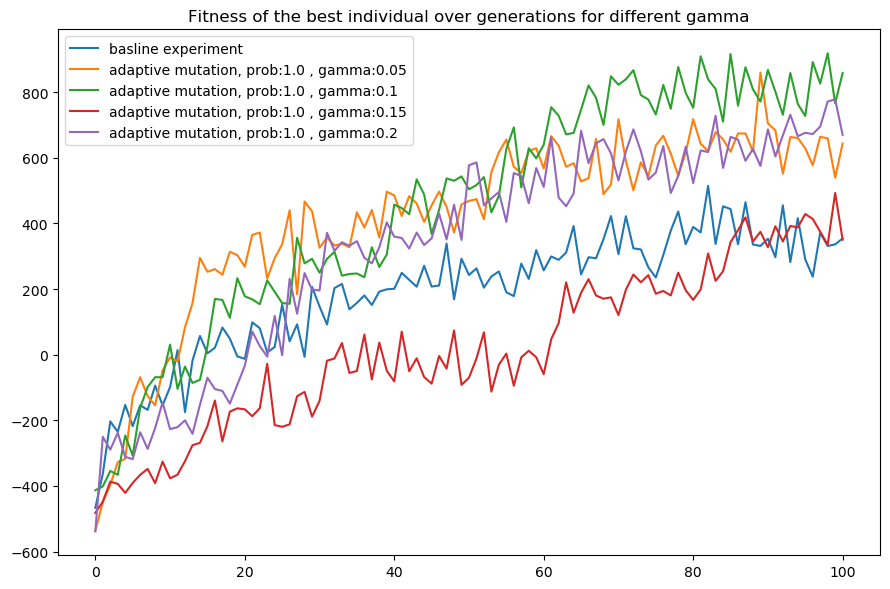

In [23]:
plot_1_exp = [0,3,2,1,4]
plt.figure(figsize=(9, 6))
for exp in plot_1_exp:
    total_fitnesses = np.zeros(101)
    for rep in range(repetitions):
        total_fitnesses = total_fitnesses + loaded_results[exp][rep]['fitness']
    plt.plot(gens, total_fitnesses/repetitions, label=loaded_results[exp]['description'])
plt.title("Fitness of the best individual over generations for different gamma")
# plt.grid()
plt.legend()
plt.tight_layout()
plt.show()


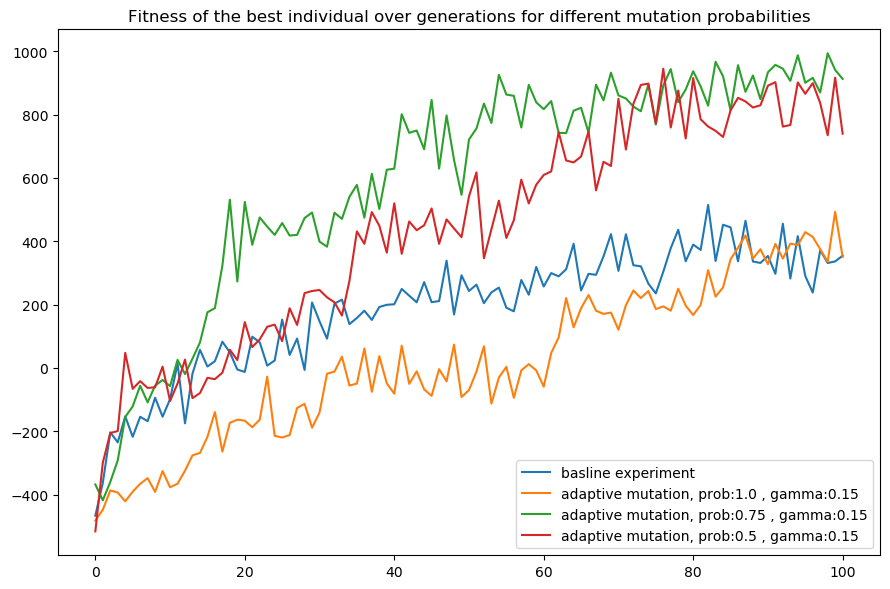

In [24]:
plot_1_exp = [0,1,5,6]
plt.figure(figsize=(9, 6))
for exp in plot_1_exp:
    total_fitnesses = np.zeros(101)
    for rep in range(repetitions):
        total_fitnesses = total_fitnesses + loaded_results[exp][rep]['fitness']
    plt.plot(gens, total_fitnesses/repetitions, label=loaded_results[exp]['description'])

plt.title("Fitness of the best individual over generations for different mutation probabilities")

plt.legend()
plt.tight_layout()
plt.show()